Primero carguemos los datos y veamos los datos con los que contamos

In [ ]:
import pandas as pd

# Cargar el archivo
file_path = "carc B.txt"
df = pd.read_csv(file_path, sep=" ", header=None, names=["Region", "MPG"])

df.head(10)


,Region,MPG
0,1,22
1,1,17
2,1,22
3,2,17
4,2,23
5,2,25
6,1,20
7,1,15
8,1,18
9,1,26


Procedemos a ordenar los dato, pero sobre la columna de MPG, para ver los minimos y los maximos . Ademas encontar otras estadisticas

In [3]:
df_sorted = df.sort_values(by=["Region", "MPG"]).reset_index(drop=True)
df_sorted

,Region,MPG
0,1,12
1,1,12
2,1,14
3,1,14
4,1,14
...,...,...
69,3,28
70,3,30
71,3,31
72,3,35


Ahora dividimos los datos por región donde 1 = Japón, 2 = Norteamérica, 3 = Europa

In [9]:
# 1 = Japón, 2 = Norteamérica, 3 = Europa
japan = df[df["Region"] == 1]["MPG"]
na = df[df["Region"] == 2]["MPG"]
eu = df[df["Region"] == 3]["MPG"]

print("\n---  Datos de Japon ---")
print(japan.head(10))
print("\n---  Datos de Norteamérica ---")
print(na.head(10))
print("\n---  Datos de Europa ---")
print(eu.head(10))


---  Datos de Japon ---
0     22
1     17
2     22
6     20
7     15
8     18
9     26
10    20
11    16
12    19
Name: MPG, dtype: int64

---  Datos de Norteamérica ---
3     17
4     23
5     25
30    21
52    14
64    28
69    25
70    41
71    25
72    23
Name: MPG, dtype: int64

---  Datos de Europa ---
22    23
23    35
24    24
25    21
33    25
34    28
38    30
65    35
66    18
67    31
Name: MPG, dtype: int64


Ahora calculamos lo siguiente: 

**Mínimo**

Definición:

$$
x^*_{\text{min}} = \min(x_1, x_2, \dots, x_n)
$$

---

**Máximo**

Definición:

$$
x^*_{\text{max}} = \max(x_1, x_2, \dots, x_n)
$$

In [10]:
print("Japón -> Min:", japan.min(), ", Max:", japan.max())
print("Norteamérica -> Min:", na.min(), ", Max:", na.max())
print("Europa -> Min:", eu.min(), ", Max:", eu.max())

Japón -> Min: 12 , Max: 34
Norteamérica -> Min: 14 , Max: 41
Europa -> Min: 18 , Max: 35


**Mediana**
$$
M = 
\begin{cases} 
x_{\frac{n+1}{2}}, & \text{si } n \text{ es impar}, \\[8pt]
\displaystyle\frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}, & \text{si } n \text{ es par}.
\end{cases}
$$

In [11]:
print("Japón -> Mediana:", japan.median())
print("Norteamérica -> Mediana:", na.median())
print("Europa -> Mediana:", eu.median())


Japón -> Mediana: 19.0
Norteamérica -> Mediana: 23.0
Europa -> Mediana: 25.0


**Primer y tercer cuartil:**

$$
Q_1 = x_{0.25}, \qquad Q_3 = x_{0.75}
$$

In [12]:
print("Japón -> Q1:", japan.quantile(0.25), ", Q3:", japan.quantile(0.75))
print("Norteamérica -> Q1:", na.quantile(0.25), ", Q3:", na.quantile(0.75))
print("Europa -> Q1:", eu.quantile(0.25), ", Q3:", eu.quantile(0.75))

Japón -> Q1: 16.75 , Q3: 22.0
Norteamérica -> Q1: 19.0 , Q3: 25.0
Europa -> Q1: 22.0 , Q3: 30.5


**Rango intercuartílico (IQR):**
$$
\mathrm{IQR} = Q_3 - Q_1
$$

**Límite inferior:**

$$
bL = Q_1 - 1.5\cdot \mathrm{IQR}
$$

**Límite superior:**

$$
bU = Q_3 + 1.5\cdot \mathrm{IQR}
$$

In [13]:
def limits(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    bL = q1 - 1.5*iqr
    bU = q3 + 1.5*iqr
    return bL, bU

print("Japón -> Límites:", limits(japan))
print("Norteamérica -> Límites:", limits(na))
print("Europa -> Límites:", limits(eu))

Japón -> Límites: (np.float64(8.875), np.float64(29.875))
Norteamérica -> Límites: (np.float64(10.0), np.float64(34.0))
Europa -> Límites: (np.float64(9.25), np.float64(43.25))


**Media aritmética:**

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In [14]:
print("Japón -> Media:", japan.mean())
print("Norteamérica -> Media:", na.mean())
print("Europa -> Media:", eu.mean())

Japón -> Media: 19.826923076923077
Norteamérica -> Media: 23.545454545454547
Europa -> Media: 26.181818181818183


**Boxplot**

<Figure size 800x600 with 0 Axes>

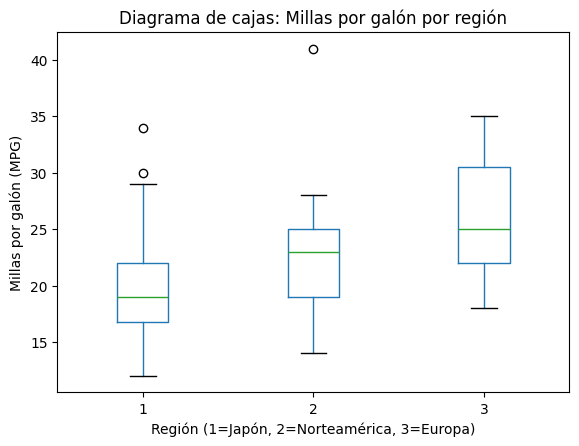

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
df.boxplot(column="MPG", by="Region", grid=False)
plt.title("Diagrama de cajas: Millas por galón por región")
plt.suptitle("")
plt.xlabel("Región (1=Japón, 2=Norteamérica, 3=Europa)")
plt.ylabel("Millas por galón (MPG)")
plt.show()